## (A) Implement a CNN architecture for FashionMNIST dataset (15 points)


*   Basic CNN architecture (5 points)
*   Include at least one layer of
      1.   ResNet module (5 points)
      2.   Inception Module (5 points)

## (B) Compare the performance of your CNN architecture with "best" architecture from HW2. (5 points)
You can reimplement your HW2 architecture in Keras to make the comparison fair.  


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np

 

In [ ]:
def load_data():
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
  y_train = to_categorical(y_train)
  y_test =  to_categorical(y_test) 
  return x_train,y_train,x_test,y_test 


In [ ]:
def normalize(x_train,x_test):
	x_train = x_train.astype('float32')
	x_test = x_test.astype('float32')
	x_train = x_train / 255.0
	x_test = x_test / 255.0
	return x_train,x_test



In [ ]:
def define_model():
  model = Sequential()
  model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))
  model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
  model.add(layers.Conv2D(96, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
  model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
x_train,y_train,x_test,y_test = load_data()
x_train,x_test = normalize(x_train,x_test)
model = define_model()
hist = model.fit(x=x_train,y=y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/15
469/469 [==============================] - 12s 26ms/step - loss: 0.7302 - accuracy: 0.7447 - val_loss: 0.4189 - val_accuracy: 0.8442
Epoch 2/15
469/469 [==============================] - 12s 25ms/step - loss: 0.3562 - accuracy: 0.8694 - val_loss: 0.3531 - val_accuracy: 0.8654
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.3048 - accuracy: 0.8891 - val_loss: 0.3175 - val_accuracy: 0.8830
Epoch 4/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2702 - accuracy: 0.8999 - val_loss: 0.2930 - val_accuracy: 0.8954
Epoch 5/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2444 - accuracy: 0.9101 - val_loss: 0.2731 - val_accuracy: 0.9002
Epoch 6/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2196 - accuracy: 0.9189 - val_loss: 0.2746 - val_accuracy: 0.9000
Epoch 7/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2017 - accuracy: 0.9248 - val_loss: 0.2510 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_186 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 7, 7, 120)         288120    
_________________________________________________________________
flatten_19 (Flatten)         (None, 5880)            

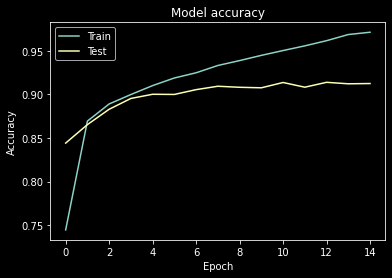

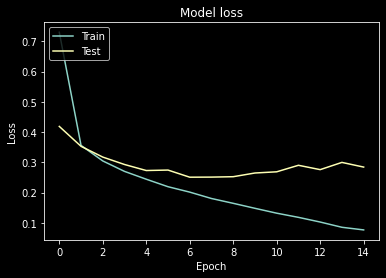

In [ ]:
# Plot training & validation accuracy values
plt.style.use('dark_background')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Basic CNN + ResNet_Module

In [ ]:
def residual_module(layer_in, n_filters):
	merge_input = layer_in
	if layer_in.shape[-1] != n_filters:
		merge_input = layers.Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	conv1 = layers.Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	conv2 = layers.Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	layer_out = layers.add([conv2, merge_input])
	layer_out = layers.Activation('relu')(layer_out)
	return layer_out

In [ ]:
def model_with_resnet(input_shape = (28,28,1)):
  # first layer of CNN
  x_input = layers.Input(input_shape)
  x = layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same")(x_input)
  x = layers.BatchNormalization(axis = 3)(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPool2D((2,2),strides = (1,1))(x)
  # 3 layers of ResNet with different no of filters
  x = residual_module(x,32)
  x = residual_module(x,64)
  x = residual_module(x,128)
  x = layers.AveragePooling2D((2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(10,activation = "softmax")(x)
  model = Model(inputs = x_input,outputs = x)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model_res = model_with_resnet()
hist = model_res.fit(x=x_train,y=y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), verbose=1)
score_res = model_res.evaluate(x_test,y_test)
print('Test loss with ResNet:', score_res[0])
print('Test accuracy with ResNet:', score_res[1])
model_res.summary()

Epoch 1/15
469/469 [==============================] - 36s 78ms/step - loss: 0.5375 - accuracy: 0.8376 - val_loss: 0.4293 - val_accuracy: 0.8814
Epoch 2/15
469/469 [==============================] - 36s 77ms/step - loss: 0.2618 - accuracy: 0.9053 - val_loss: 0.2966 - val_accuracy: 0.8964
Epoch 3/15
469/469 [==============================] - 36s 77ms/step - loss: 0.2229 - accuracy: 0.9193 - val_loss: 0.2430 - val_accuracy: 0.9130
Epoch 4/15
469/469 [==============================] - 36s 77ms/step - loss: 0.1971 - accuracy: 0.9296 - val_loss: 0.2546 - val_accuracy: 0.9098
Epoch 5/15
469/469 [==============================] - 36s 77ms/step - loss: 0.1735 - accuracy: 0.9366 - val_loss: 0.2407 - val_accuracy: 0.9135
Epoch 6/15
469/469 [==============================] - 36s 77ms/step - loss: 0.1559 - accuracy: 0.9433 - val_loss: 0.2511 - val_accuracy: 0.9125
Epoch 7/15
469/469 [==============================] - 36s 77ms/step - loss: 0.1388 - accuracy: 0.9491 - val_loss: 0.2607 - val_accuracy:

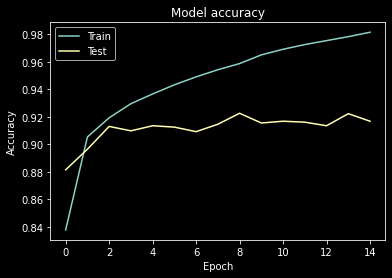

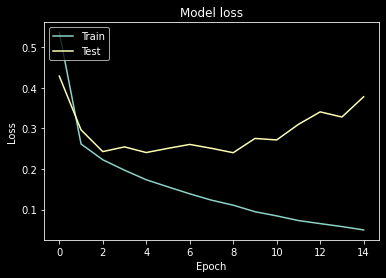

In [ ]:
# Plot training & validation accuracy values
plt.style.use('dark_background')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Basic CNN + Inception_Module

In [ ]:
def inception_module(x,filter_1x1,filter_3x3_reduce,filter_3x3,filter_5x5_reduce,filter_5x5,filter_pool_proj):
  conv_1x1 = layers.Conv2D(filter_1x1,(1,1),padding ="same",activation = "relu")(x)
  conv_3x3 = layers.Conv2D(filter_3x3_reduce,(1,1),padding="same",activation="relu")(x)
  conv_3x3 = layers.Conv2D(filter_3x3,(3,3),padding="same",activation="relu")(conv_3x3)
  conv_5x5 = layers.Conv2D(filter_5x5_reduce,(1,1),padding="same",activation="relu")(x)
  conv_5x5 = layers.Conv2D(filter_5x5,(5,5),padding="same",activation="relu")(conv_5x5)
  pool_proj = layers.MaxPool2D((3,3),strides=(1,1),padding="same")(x)
  pool_proj = layers.Conv2D(filter_pool_proj,(1,1),padding="same",activation="relu")(pool_proj)
  output_inception = layers.concatenate([conv_1x1,conv_3x3,conv_5x5,pool_proj],axis = 3)
  return output_inception

In [ ]:
def model_with_inception(input_shape = (28,28,1)):
  x_input = layers.Input(input_shape)
  x = layers.Conv2D(64,(3,3),strides = (2,2),padding="same",activation="relu")(x_input)
  x = layers.MaxPool2D((3,3),strides=(2,2))(x)
  x = inception_module(x,32,64,96,16,32,32)
  x = inception_module(x,128,128,192,32,96,64)
  x = inception_module(x,192,96,208,16,48,64)
  x = layers.AveragePooling2D((5, 5), strides=(3,3))(x)
  x = layers.Conv2D(128,(1,1),padding = "same",activation='relu')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(1024,activation="relu")(x)
  x = layers.Dense(100,activation="relu")(x)
  x = layers.Dense(10,activation="softmax")(x)
  model = Model(inputs = x_input,outputs = x)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model_inc = model_with_inception()
hist = model_inc.fit(x=x_train,y=y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), verbose=1)
score_inc = model_inc.evaluate(x_test, y_test, verbose=0)
print('Test loss with Inception :', score_inc[0])
print('Test accuracy with Inception :', score_inc[1])


Epoch 1/15
469/469 [==============================] - 11s 24ms/step - loss: 0.8047 - accuracy: 0.6863 - val_loss: 0.5660 - val_accuracy: 0.7706
Epoch 2/15
469/469 [==============================] - 11s 24ms/step - loss: 0.4741 - accuracy: 0.8218 - val_loss: 0.4251 - val_accuracy: 0.8434
Epoch 3/15
469/469 [==============================] - 11s 24ms/step - loss: 0.3714 - accuracy: 0.8636 - val_loss: 0.3719 - val_accuracy: 0.8663
Epoch 4/15
469/469 [==============================] - 11s 24ms/step - loss: 0.3199 - accuracy: 0.8815 - val_loss: 0.3588 - val_accuracy: 0.8658
Epoch 5/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2942 - accuracy: 0.8916 - val_loss: 0.3161 - val_accuracy: 0.8868
Epoch 6/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2691 - accuracy: 0.8999 - val_loss: 0.3038 - val_accuracy: 0.8883
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2482 - accuracy: 0.9083 - val_loss: 0.2821 - val_accuracy:

In [ ]:
model_inc.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 14, 14, 64)   640         input_16[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_54 (MaxPooling2D) (None, 6, 6, 64)     0           conv2d_190[0][0]                 
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 6, 6, 64)     4160        max_pooling2d_54[0][0]           
___________________________________________________________________________________________

### Comparison on HW_2 best architecture

In [ ]:
def ANN_simple():
  input_dim = 784
  num_classes = 10
  model = Sequential()
  model.add(layers.Dense(185,input_shape = (input_dim,),activation="relu"))
  model.add(layers.Dense(84,activation="relu"))
  model.add(layers.Dense(60,activation="relu"))
  model.add(layers.Dense(70,activation="relu"))
  model.add(layers.Dense(num_classes,activation="softmax"))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
(X_train_n, y_train_n), (X_test_n, y_test_n) = fashion_mnist.load_data()
X_train_n = X_train_n.reshape(60000, 28*28)
X_test_n  = X_test_n.reshape(10000, 28*28)
X_train_n = X_train_n.astype('float32') 
X_test_n  = X_test_n.astype('float32')
X_train_n /= 255
X_test_n  /= 255
y_train_n = to_categorical(y_train_n)
y_test_n =  to_categorical(y_test_n) 


In [ ]:
model_ann = ANN_simple()
history = model_ann.fit(X_train_n,y_train_n,batch_size=128,epochs = 15,validation_data=(X_test_n, y_test_n))
model_ann.summary()

Epoch 1/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5582 - accuracy: 0.8014 - val_loss: 0.4493 - val_accuracy: 0.8375
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8612 - val_loss: 0.3742 - val_accuracy: 0.8649
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8747 - val_loss: 0.3763 - val_accuracy: 0.8631
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8833 - val_loss: 0.3470 - val_accuracy: 0.8751
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8885 - val_loss: 0.3583 - val_accuracy: 0.8703
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.8954 - val_loss: 0.3509 - val_accuracy: 0.8736
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.9004 - val_loss: 0.3559 - val_accuracy: 0.8730
Epoch 

In [ ]:
score_ann = model_ann.evaluate(X_test,y_test)
print("Test_results_Loss : ", score_ann[0])
print("Test_results_Accuracy : ", score_ann[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8840
Test_results_Loss :  0.3326632082462311
Test_results_Accuracy :  0.8840000033378601


In [ ]:
from google.colab import data_table
import pandas as pd
Architecture = ['Basic CNN',"CNN with ResNet","CNN with Inception","Homework-2 Best Architecture"]
Number_of_layers = ["4 convolution layers","1 convolution + 3 Residual Layers","2 convolution + 3 inception layer","4 Densely Connected Layers"]
Trainable_param = ['6,526,326','534,186','1,121,878','170,929']
Training_accuracy = ['97.13 %','98.98 %','95.40 %','92.14 %']
Validation_accuracy = ['91.25 %','92.05 %','90.40 %','88.40 %']
results_table = pd.DataFrame({
    'Architecture':Architecture,
    'Number of Layers': Number_of_layers,
    'Trainable parameter': Trainable_param,
    'Training Accuracy':Training_accuracy,
    'Validation Accuracy': Validation_accuracy    
})

In [ ]:
data_table.DataTable(results_table,num_rows_per_page=4)

,Architecture,Number of Layers,Trainable parameter,Training Accuracy,Validation Accuracy
0,Basic CNN,4 convolution layers,"6,526,326",97.13 %,91.25 %
1,CNN with ResNet,1 convolution + 3 Residual Layers,"534,186",98.98 %,92.05 %
2,CNN with Inception,2 convolution + 3 inception layer,"1,121,878",95.40 %,90.40 %
3,Homework-2 Best Architecture,4 Densely Connected Layers,"170,929",92.14 %,88.40 %


### Conclusion 

- **Comparison with HomeWork - 2 Best Architecture** : CNN gives significantly better performance as convolution layers detects the complex patterns in the images compared to ANN architecture
- **Comparison of CNN Architecture** - Out of the 3 architecture given in the table above ResNet performs better with residual layers and less number of trainable parameters